In [4]:
from IPython.display import HTML
import tensorflow as tf
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import splitfolders

import os
import pandas as pd
import numpy as np

from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.python.client import device_lib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Activation, Dense, Conv2D, MaxPool2D,MaxPooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

import warnings
warnings.filterwarnings('ignore')

In [6]:
# Define the path to the data directory
data_dir = r"C:\Users\kingk\Downloads\pepper images"

# Prepare file paths and labels
filepaths = []
labels = []

# Collect file paths and labels
folds = os.listdir(data_dir)
for fold in folds:
    foldpath = os.path.join(data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

# Create DataFrame
df = pd.DataFrame({
    'filepaths': filepaths,
    'labels': labels
})

# Split Data

In [7]:
# Split data into training, validation, and test sets
train_df, temp_df = train_test_split(df, test_size=0.2, shuffle=True, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, shuffle=True, random_state=42)

# Rescale and Rotation for Transformation

In [8]:
#rescale and rotation for transformation
IMAGE_SIZE = 256
CHANNELS = 3# Image Data Generator for loading images
datagen = ImageDataGenerator(rescale=1./255)

# Training data generator
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepaths',
    y_col='labels',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    class_mode='binary',  # Assuming binary classification
    batch_size=32
)

# Validation data generator
val_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='filepaths',
    y_col='labels',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

# Test data generator
test_generator = datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepaths',
    y_col='labels',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    class_mode='binary',
    batch_size=32,
    shuffle=False
)


Found 1980 validated image filenames belonging to 2 classes.
Found 247 validated image filenames belonging to 2 classes.
Found 248 validated image filenames belonging to 2 classes.


In [9]:
input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
PCnnmodel = models.Sequential([
        layers.InputLayer(input_shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),  # Corrected here
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),  # Corrected here
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),  # Corrected here
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),  # Corrected here
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),  # Corrected here
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    
])

PCnnmodel.summary()
PCnnmodel.compile(
    optimizer= 'adam',
    loss= 'binary_crossentropy',
    metrics = ['accuracy']
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 277,761 (1.06 MB)

 Trainable params: 277,761 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = PCnnmodel.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    verbose=1
)

Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 63s 975ms/step - accuracy: 0.6086 - loss: 0.6547 - val_accuracy: 0.9393 - val_loss: 0.2172
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 57s 923ms/step - accuracy: 0.9242 - loss: 0.2567 - val_accuracy: 0.9474 - val_loss: 0.1737
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 57s 910ms/step - accuracy: 0.9479 - loss: 0.1734 - val_accuracy: 0.9595 - val_loss: 0.1133
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 58s 927ms/step - accuracy: 0.9728 - loss: 0.1249 - val_accuracy: 0.9879 - val_loss: 0.0595
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 59s 956ms/step - accuracy: 0.9930 - loss: 0.0290 - val_accuracy: 0.9919 - val_loss: 0.0403
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 57s 923ms/step - accuracy: 0.9955 - loss: 0.0219 - val_accuracy: 0.9838 - val_loss: 0.0911
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 59s 955ms/step - accuracy: 0.9923 - loss: 0.0276 - val_accuracy: 0.9879 - val_loss: 0.0654
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 61s 982ms/step - accuracy: 0.9914 - loss: 0.0306 - val_accu

In [11]:
# Evaluate the model on the validation set
train_loss, train_acc = PCnnmodel.evaluate(train_generator)

62/62 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - accuracy: 1.0000 - loss: 3.4193e-04


In [12]:
# Evaluate the model
test_loss, test_acc = PCnnmodel.evaluate(test_generator)

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 432ms/step - accuracy: 0.9933 - loss: 0.0298


In [13]:
# Evaluate the model on the validation set
val_loss, val_acc = PCnnmodel.evaluate(val_generator)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 192ms/step - accuracy: 0.9901 - loss: 0.1634


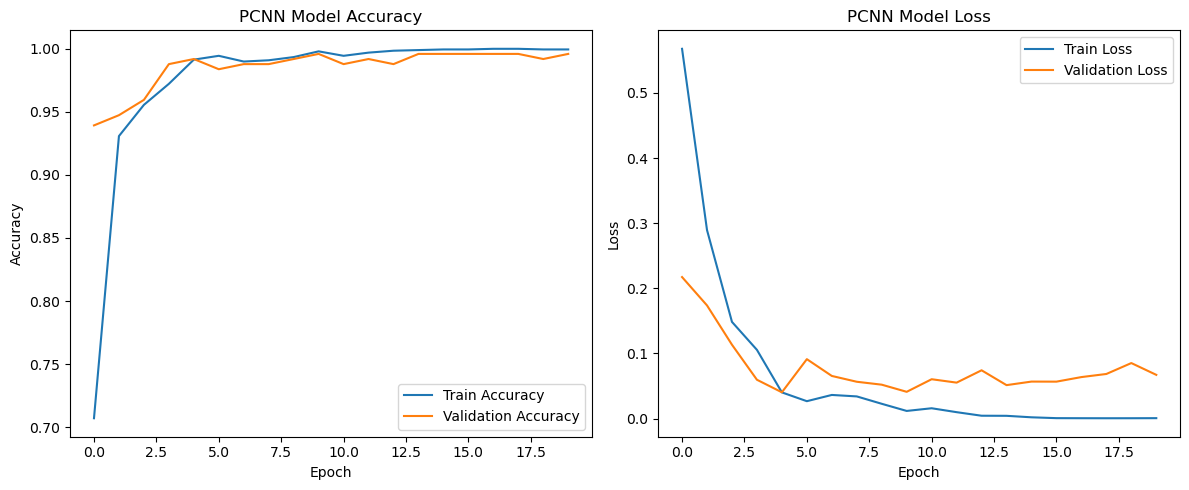

In [14]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('PCNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('PCNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [15]:
# Get predicted probabilities
pred_probabilities = PCnnmodel.predict(test_generator)
threshold = 0.5
predictions = pred_probabilities > threshold

# Evaluate performance
print(classification_report(test_generator.classes, predictions))

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 212ms/step
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       104
           1       0.98      1.00      0.99       144

    accuracy                           0.99       248
   macro avg       0.99      0.99      0.99       248
weighted avg       0.99      0.99      0.99       248



In [16]:
# Confusion matrix
cm = confusion_matrix(test_generator.classes, predictions)
cm

array([[101,   3],
       [  0, 144]], dtype=int64)

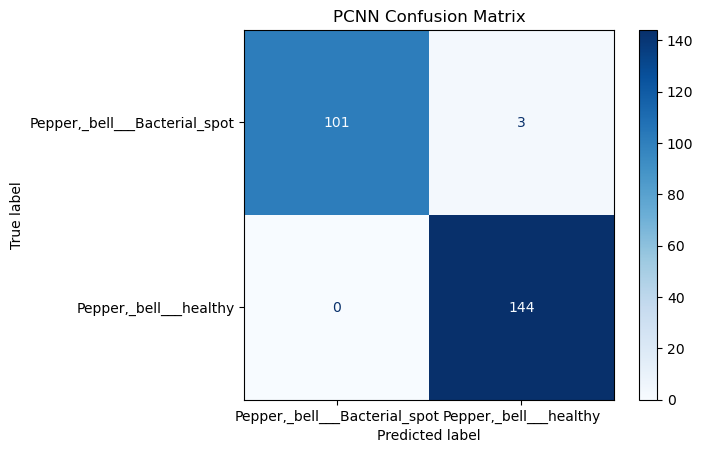

In [17]:
# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('PCNN Confusion Matrix')
plt.show()

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 203ms/step


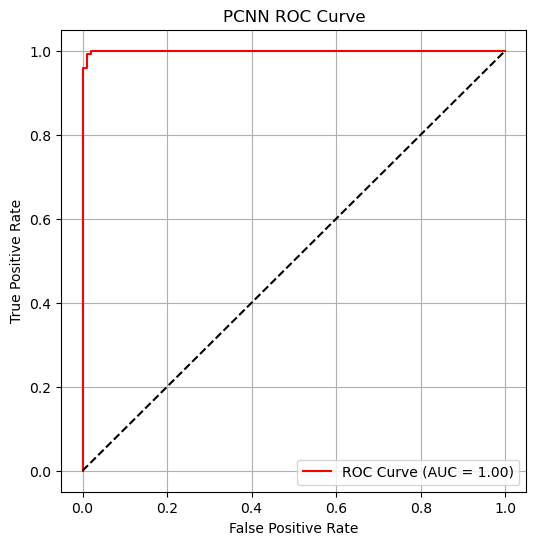

In [21]:
# ROC Curve
y_true = test_generator.classes  # Actual class labels
y_pred = PCnnmodel.predict(test_generator) 
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='red')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('PCNN ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [22]:
img_classes  = os.listdir(r"C:\Users\kingk\Downloads\pepper images")
print(img_classes)

['Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy']


first image to predict
actual label: Pepper,_bell___Bacterial_spot
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
predicted label: Pepper,_bell___Bacterial_spot


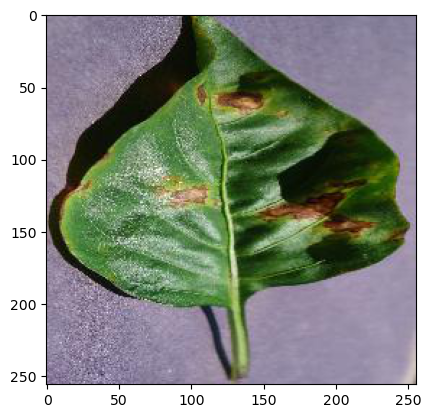

In [23]:
import numpy as np

for images_batch, label_batch in test_generator:
    
    first_image = images_batch[0]
    first_label = int(label_batch[0])
    
    print('first image to predict')
    plt.imshow(first_image)
    print('actual label:', img_classes[first_label])
    
    batch_prediction = PCnnmodel.predict(images_batch)
    print('predicted label:', img_classes[np.argmax(batch_prediction[0])])
    
    break

In [31]:
from tensorflow.keras.saving import save_model

save_model(PCnnmodel, 'P_CNN.keras')
save_model(PCnnmodel, 'P_CNN.h5')